In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
os.chdir(r'C:\Users\ASUS\Documents\Datasets')

In [3]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.columns=['id', 'gender', 'age', 'income', 'spend']
df

,id,gender,age,income,spend
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
# Define Feature

x = df[['income', 'spend']]
x

,income,spend
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [6]:
x.isna().sum()

income    0
spend     0
dtype: int64

## Preprocessing

In [7]:
# Scaling

from sklearn.preprocessing import StandardScaler

In [8]:
ss = StandardScaler()

In [9]:
x1 = ss.fit_transform(x)
x1

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

## Model

In [10]:
# Hierarchical Clustering

from sklearn.cluster import AgglomerativeClustering

In [11]:
agc = AgglomerativeClustering()
agc

AgglomerativeClustering()

In [12]:
agc.fit(x1)

AgglomerativeClustering()

## Labels

In [13]:
lab = agc.labels_
lab

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int64)

## Evaluation

In [14]:
from sklearn.metrics import silhouette_score

In [15]:
silhouette_score(x1, lab)

0.3842337621772661

In [16]:
# Find the best cluster using loop

list1 = []

for i in range(2, 10):
    ag = AgglomerativeClustering(n_clusters=i)
    ag.fit(x1)
    l1 = ag.labels_
    score = silhouette_score(x1, l1)
    list1.append(score)

In [17]:
list1

[0.3842337621772661,
 0.4610481446570447,
 0.4925507715349343,
 0.5538089226688662,
 0.5386761871036926,
 0.5197949293475768,
 0.4308617778221774,
 0.43768997758154127]

In [18]:
# Do the changes in number of cluster

agc1 = AgglomerativeClustering(n_clusters=5)
agc1

AgglomerativeClustering(n_clusters=5)

In [19]:
agc1.fit(x1)

AgglomerativeClustering(n_clusters=5)

In [20]:
lab1 = agc1.labels_
lab1

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int64)

## plot Graph

Text(0, 0.5, 'silhouette score')

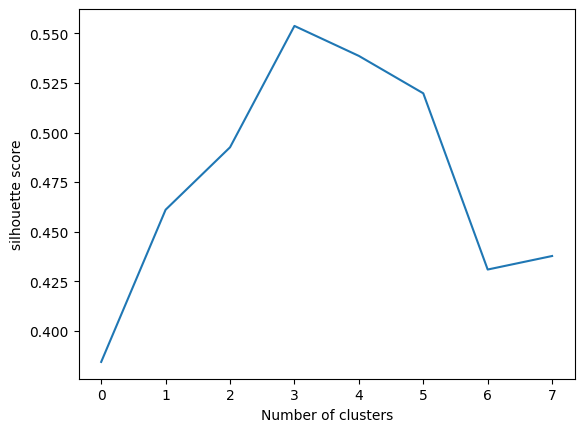

In [21]:
plt.plot(list1)
plt.xlabel('Number of clusters')
plt.ylabel('silhouette score')

In [22]:
df1 = x

In [23]:
df1['Labels'] = lab1
df1

C:\Users\ASUS\AppData\Local\Temp\ipykernel_976\2726947514.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Labels'] = lab1


,income,spend,Labels
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4
...,...,...,...
195,120,79,1
196,126,28,0
197,126,74,1
198,137,18,0


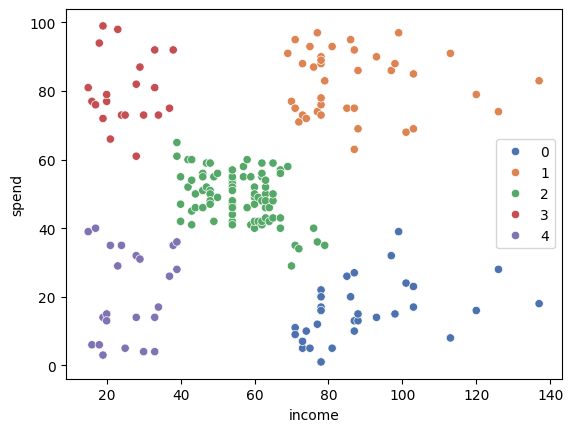

In [24]:
sns.scatterplot(x = 'income', y = 'spend', data = df1, hue = lab1, palette = 'deep' )
plt.show()

## Dendogram

In [25]:
from scipy.spatial import distance_matrix

In [26]:
dm = distance_matrix(x,x)
dm

array([[  0.        ,  42.01190308,  33.01514804, ..., 116.42594213,
        123.85879056, 129.72663566],
       [ 42.01190308,   0.        ,  75.01333215, ..., 111.23848255,
        137.33899665, 122.03278248],
       [ 33.01514804,  75.01333215,   0.        , ..., 129.35609765,
        121.65936051, 143.45382532],
       ...,
       [116.42594213, 111.23848255, 129.35609765, ...,   0.        ,
         57.07889277,  14.2126704 ],
       [123.85879056, 137.33899665, 121.65936051, ...,  57.07889277,
          0.        ,  65.00769185],
       [129.72663566, 122.03278248, 143.45382532, ...,  14.2126704 ,
         65.00769185,   0.        ]])

In [27]:
from scipy.cluster.hierarchy import linkage

In [28]:
link = linkage(dm, method='complete')
link

C:\Users\ASUS\AppData\Local\Temp\ipykernel_976\4017609001.py:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  link = linkage(dm, method='complete')


array([[ 65.        ,  68.        ,   0.        ,   2.        ],
       [ 48.        ,  49.        ,   0.        ,   2.        ],
       [156.        , 158.        ,   0.        ,   2.        ],
       [129.        , 131.        ,   0.        ,   2.        ],
       [ 10.        ,  14.        ,   8.663133  ,   2.        ],
       [ 64.        ,  66.        ,   9.46968507,   2.        ],
       [170.        , 174.        ,   9.50161565,   2.        ],
       [ 67.        ,  69.        ,   9.50641182,   2.        ],
       [ 60.        ,  61.        ,   9.59367283,   2.        ],
       [ 78.        ,  80.        ,   9.72407552,   2.        ],
       [ 74.        ,  77.        ,   9.72743395,   2.        ],
       [ 75.        ,  76.        ,   9.78334406,   2.        ],
       [ 98.        , 105.        ,   9.83438057,   2.        ],
       [ 92.        ,  97.        ,   9.92439425,   2.        ],
       [119.        , 120.        ,   9.94985482,   2.        ],
       [107.        , 113

In [29]:
from scipy.cluster.hierarchy import dendrogram

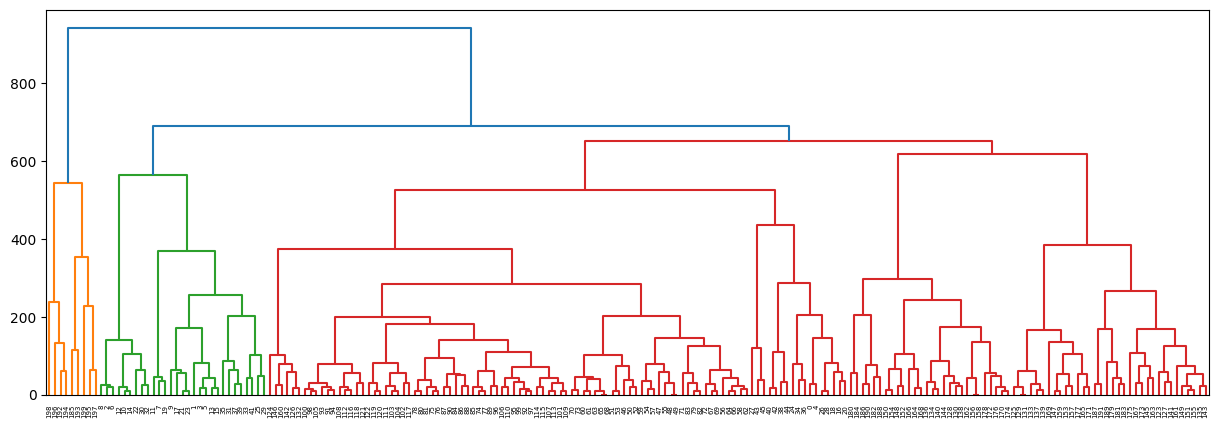

In [30]:
plt.figure(figsize = (15,5))
q = dendrogram(link)